In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------
# Step 1: Load a Pre-trained Model (ResNet-50)
# -------------------------------------
# We will load a pre-trained ResNet-50 model trained on ImageNet.
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
# Set the model to evaluation mode
model.eval()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:17<00:00, 5.83MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from datasets import load_dataset
from PIL import Image

# -------------------------------------------------------------------
# Step 1: Load a pre-trained MobileNetV2 model from torchvision
# -------------------------------------------------------------------
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

# -------------------------------------------------------------------
# Step 2: Load a subset of the CIFAR-10 dataset from Hugging Face
# This gives us PIL Images stored in the "img" column.
# -------------------------------------------------------------------
dataset = load_dataset("cifar10", split="train[:20]")
# dataset is now a Dataset object with images and labels.
# Each example: {"img": PIL image, "label": int}

# -------------------------------------------------------------------
# Step 3: Define the preprocessing transformations
# MobileNetV2 expects images of size 224x224 and normalized
# according to ImageNet mean and std.
# -------------------------------------------------------------------
preprocess = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet mean
        std=[0.229, 0.224, 0.225]    # ImageNet std
    )
])

# -------------------------------------------------------------------
# Step 4: Preprocess and stack the images into a single batch
# -------------------------------------------------------------------
images = []
for example in dataset:
    pil_img = example["img"]  # PIL Image
    img_tensor = preprocess(pil_img) # (3, 224, 224)
    images.append(img_tensor)

# Create a batch: shape (batch_size, 3, 224, 224)
images = torch.stack(images)


In [32]:
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
for n,p in model.named_parameters(): print(n, p.shape)

features.0.0.weight torch.Size([32, 3, 3, 3])
features.0.1.weight torch.Size([32])
features.0.1.bias torch.Size([32])
features.1.conv.0.0.weight torch.Size([32, 1, 3, 3])
features.1.conv.0.1.weight torch.Size([32])
features.1.conv.0.1.bias torch.Size([32])
features.1.conv.1.weight torch.Size([16, 32, 1, 1])
features.1.conv.2.weight torch.Size([16])
features.1.conv.2.bias torch.Size([16])
features.2.conv.0.0.weight torch.Size([96, 16, 1, 1])
features.2.conv.0.1.weight torch.Size([96])
features.2.conv.0.1.bias torch.Size([96])
features.2.conv.1.0.weight torch.Size([96, 1, 3, 3])
features.2.conv.1.1.weight torch.Size([96])
features.2.conv.1.1.bias torch.Size([96])
features.2.conv.2.weight torch.Size([24, 96, 1, 1])
features.2.conv.3.weight torch.Size([24])
features.2.conv.3.bias torch.Size([24])
features.3.conv.0.0.weight torch.Size([144, 24, 1, 1])
features.3.conv.0.1.weight torch.Size([144])
features.3.conv.0.1.bias torch.Size([144])
features.3.conv.1.0.weight torch.Size([144, 1, 3, 3])

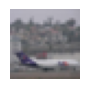

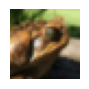

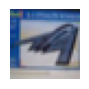

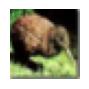

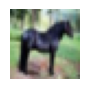

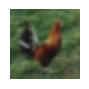

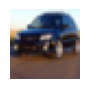

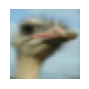

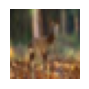

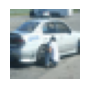

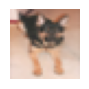

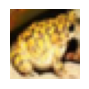

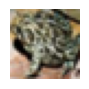

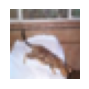

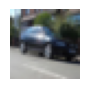

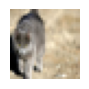

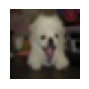

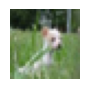

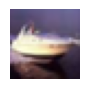

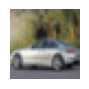

In [27]:
# Show an image from images.shape
for d in dataset:
    plt.figure(figsize=(1,1))
    plt.imshow(transforms.ToTensor()(d['img']).permute(1,2,0))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    

In [12]:
# Load the full training dataset
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

AttributeError: 'PngImageFile' object has no attribute 'shape'